In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

In [2]:
# Importing csv files for wildfires and for census years.
wildfires = pd.read_csv("NOAA_CSVs/wildfires_2010_2019.csv")
census_data_2010 = pd.read_csv(f"Census_csvs/2010_census_data_ca_county.csv")
census_data_2011 = pd.read_csv(f"Census_csvs/2011_census_data_ca_county.csv")
census_data_2012 = pd.read_csv(f"Census_csvs/2012_census_data_ca_county.csv")
census_data_2013 = pd.read_csv(f"Census_csvs/2013_census_data_ca_county.csv")
census_data_2014 = pd.read_csv(f"Census_csvs/2014_census_data_ca_county.csv")
census_data_2015 = pd.read_csv(f"Census_csvs/2015_census_data_ca_county.csv")
census_data_2016 = pd.read_csv(f"Census_csvs/2016_census_data_ca_county.csv")
census_data_2017 = pd.read_csv(f"Census_csvs/2017_census_data_ca_county.csv")
census_data_2018 = pd.read_csv(f"Census_csvs/2018_census_data_ca_county.csv")
census_data_2019 = pd.read_csv(f"Census_csvs/2019_census_data_ca_county.csv")

In [3]:
def rename_location(fire):
    name = fire.partition(" COUNTY")
    fire = str(name[0] + name[1])
    return fire
def filter_counties(list1, list2):
    return ([i for i in list1 if
             any(j in i for j in list2)])

In [4]:
# PROBABLY WANT TO USE THIS ELSEWHERE LATER ON BUT FOR NOW WANT ALL COLUMNS ------------------------------
# Makes smaller DataFrame from wildfires for relevant columns.
# wildfires = wildfires[['EVENT_ID','CZ_NAME_STR','CZ_FIPS']]

# Variables for parsing lists.
fire = ""
new_names = []
chosen_names = []
substring = "(ZONE)"
census_names = [census_data_2010["Name"]]

# Parses through both lists of counties and pulls out only shared values.
for fire in wildfires["CZ_NAME_STR"]:
    fire = rename_location(fire)
    new_names.append(fire)
wildfires["CZ_NAME_STR"] = new_names
for name in new_names:
    if substring not in name:
        if name not in chosen_names:
            chosen_names.append(name.title())
for name in census_data_2010['Name']:
    census_names.append(name.title())
list1 = census_names
list2 = chosen_names
utile_counties = filter_counties(list1, list2)
for county in range(len(utile_counties)):
    utile_counties[county] = utile_counties[county].upper()

In [5]:
# Reduces NOAA data to rows found in the usable counties. (119 Fires in Ten Years)
chosen_fires = pd.DataFrame()
chosen_fires = wildfires[wildfires["CZ_NAME_STR"].isin(utile_counties)]
# Renames columns.
chosen_fires = chosen_fires[['EVENT_ID','CZ_NAME_STR','CZ_FIPS']]
chosen_fires.rename(columns={"EVENT_ID":"Fire ID","CZ_NAME_STR":"County Name","CZ_FIPS":"FIP"}, inplace=True)

In [6]:
# Fire counts by county. Renames columns.
county_fires = pd.DataFrame(chosen_fires["County Name"].value_counts())
county_fires = county_fires.reset_index()
county_fires.rename(columns={"index":"County","County Name":"Fires"},inplace=True)
county_fires = county_fires.sort_values("County")
county_fires.set_index("County")
county_fires.reset_index()
county_fires

,County,Fires
2,LOS ANGELES COUNTY,16
3,MODOC COUNTY,16
9,ORANGE COUNTY,2
7,RIVERSIDE COUNTY,6
4,SAN BERNARDINO COUNTY,14
0,SAN DIEGO COUNTY,25
8,SAN LUIS OBISPO COUNTY,4
5,SANTA BARBARA COUNTY,11
6,TULARE COUNTY,6
1,VENTURA COUNTY,19


<BarContainer object of 10 artists>

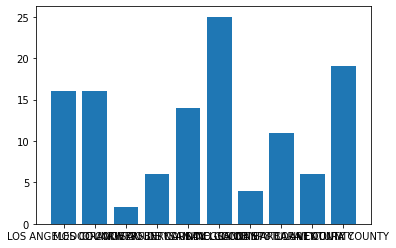

In [7]:
# Bar graphing.
x_values = county_fires["County"]
y_values = county_fires["Fires"]
plt.bar(x_values, y_values)